In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [31]:
gold_p = pd.read_csv(r"D:\Python\ML projects\8. Gold Price\gld_price_data.csv")

In [32]:
gold_p.head()

# SPX = snp stock index


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [33]:
gold_p.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [34]:
gold_p.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [35]:
gold_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [36]:
correlation = gold_p.corr()

<AxesSubplot:>

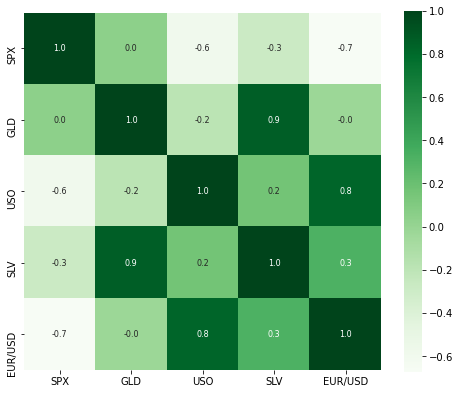

In [37]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, cbar_kws={'shrink':.83}, square=True, 
            fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greens')

In [38]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<AxesSubplot:xlabel='GLD', ylabel='Count'>

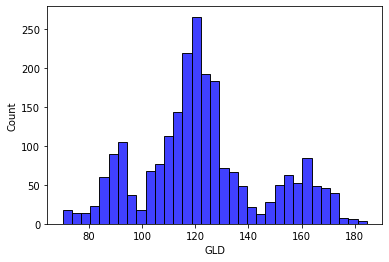

In [39]:
sns.histplot(gold_p['GLD'], color='blue')

In [40]:
x= gold_p.drop(['Date','GLD'],axis=1)
y= gold_p['GLD']

In [29]:
print(x,y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns] 0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [46]:
print(x_train.shape, x.shape, x_test.shape)

(1832, 4) (2290, 4) (458, 4)


In [47]:
model = RandomForestRegressor(n_estimators=100)

In [48]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [51]:
predict_train = model.predict(x_train)
r_squared_train = metrics.r2_score(predict_train, y_train)
print(r_squared_train)

0.9984831875199107


In [52]:
predict_test = model.predict(x_test)
r_squared_test = metrics.r2_score(predict_test, y_test)
print(r_squared_test)

0.9865504576675591


In [53]:
# compare actual and predcited values

y_test = list(y_test) # to avoid some errors

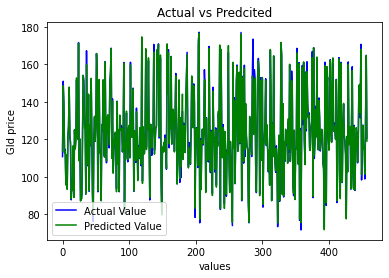

In [55]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(predict_test, color='green', label = 'Predicted Value')
plt.title('Actual vs Predcited')
plt.xlabel('values')
plt.ylabel('Gld price')
plt.legend()
plt.show()